# Predicting heart disease using machine learning

This notebook looks into using various python based machine learning and data science librairies in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We will take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical paramets about a patient can we predict whether or not they have heart disease.

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    1. Typical angina: chest pain related decrease blood supply to the heart
    2. Atypical angina: chest pain not related to heart
    3. Non-anginal pain: typically esophageal spasms (non heart related)
    4. Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - thalium stress result
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Prepare tools

We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
try:
    # Import libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    %matplotlib inline

    # Scikit-Learn models
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier

    # Model evaluations
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.metrics import precision_score, recall_score, f1_score
    from sklearn.metrics import RocCurveDisplay
    
    print('Libraries, models and evaluations loaded successfully.')
    
except error:
    print('Error occured')
    print(error)

Libraries, models and evaluations loaded successfully.


## Load data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
x = df.shape
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 303, Columns: 14


## Data exploration

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Patients with heart disease:
True - 165 patients
False - 138 patients


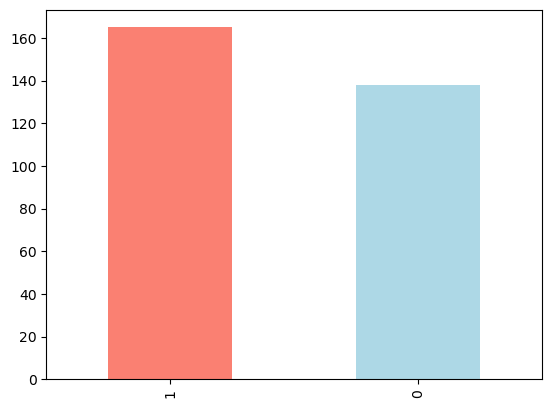

In [4]:
# Split of patients with and without heart disease
heart_disease_split = df.target.value_counts()

# Text output
print('Patients with heart disease:')
print(f'True - {heart_disease_split[1]} patients')
print(f'False - {heart_disease_split[0]} patients')

# Plot a simple bar graph
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [5]:
# Explore the dtypes of the various columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Check to see if there are any missing values (null)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [8]:
sex_split = df.sex.value_counts()

# Text output
print('Patient count by sex:')
print(f'Male - {sex_split[1]} patients')
print(f'Female - {sex_split[0]} patients')

Patient count by sex:
Male - 207 patients
Female - 96 patients


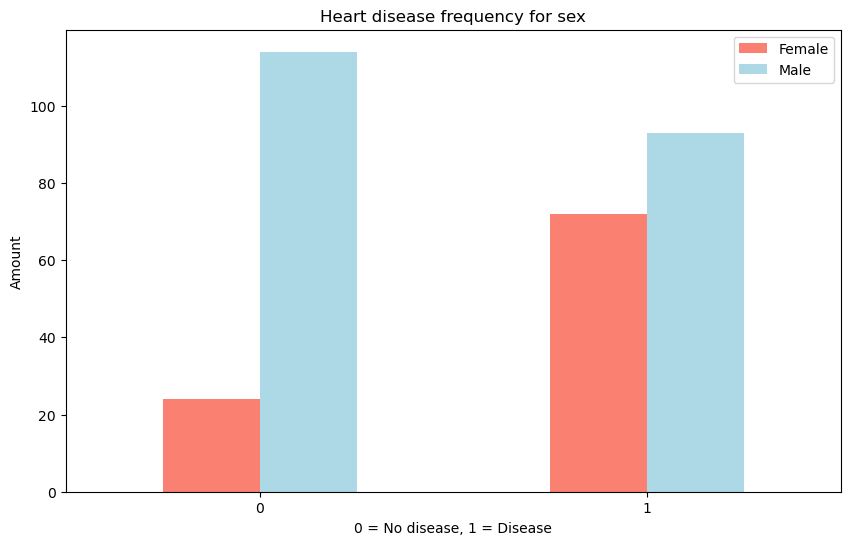

In [9]:
# Create a plot which displays the split between male 
# and female patients who have heart disease.
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue'])
plt.title('Heart disease frequency for sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

## Age vs. maximum heart rate for heart disease

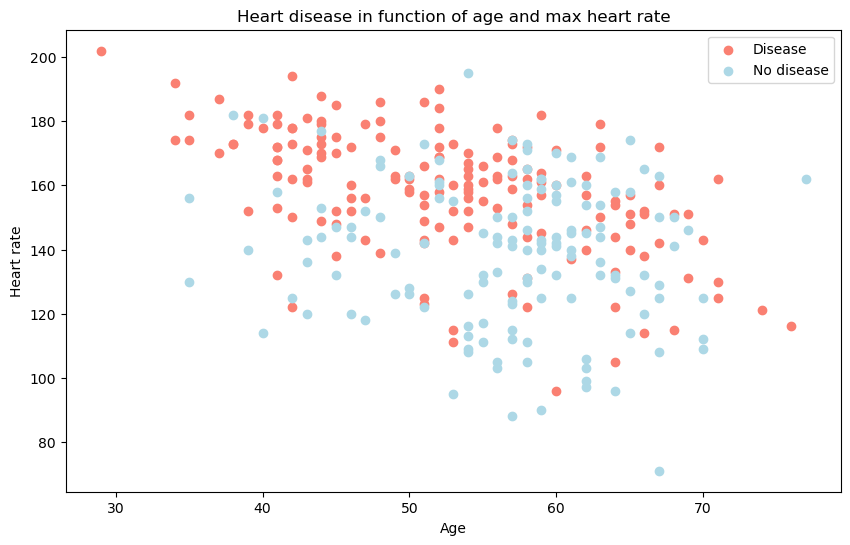

In [10]:
plt.figure(figsize=(10, 6))

# Patients with heart disease
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='salmon');

# Patients without heart disease
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='lightblue');

plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.legend(['Disease', 'No disease']);

## Heart disease frequency per chest pain type

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

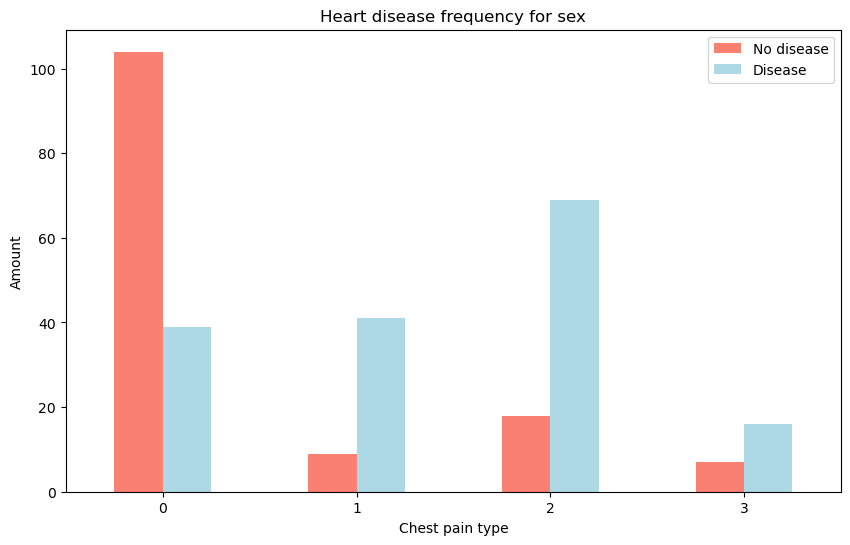

In [11]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue'])
plt.title('Heart disease frequency for sex')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation=0);

## Cholestorol vs. Heart Disease

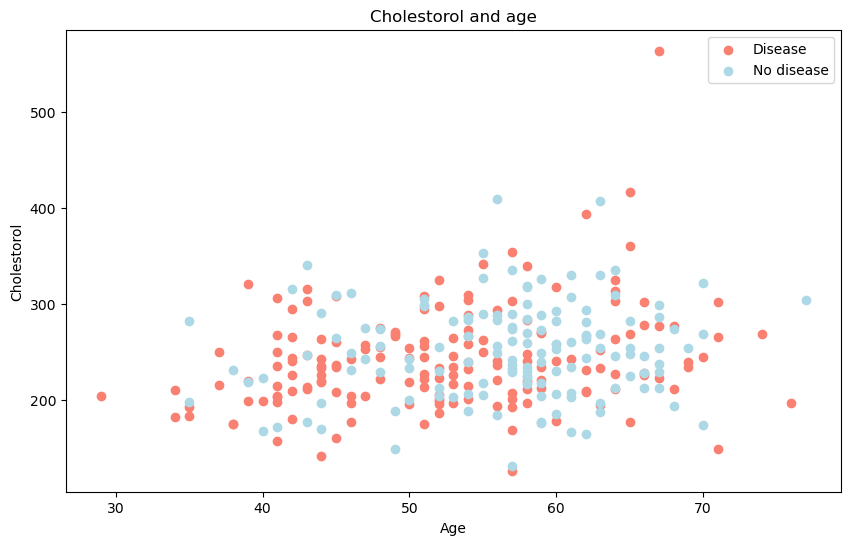

In [12]:
plt.figure(figsize=(10, 6))

# Patients with heart disease
plt.scatter(df.age[df.target==1], df.chol[df.target==1], color='salmon');

# Patients without heart disease
plt.scatter(df.age[df.target==0], df.chol[df.target==0], color='lightblue');

plt.title('Cholestorol and age')
plt.xlabel('Age')
plt.ylabel('Cholestorol')
plt.legend(['Disease', 'No disease']);

## Noteable distributions of the data

### Age

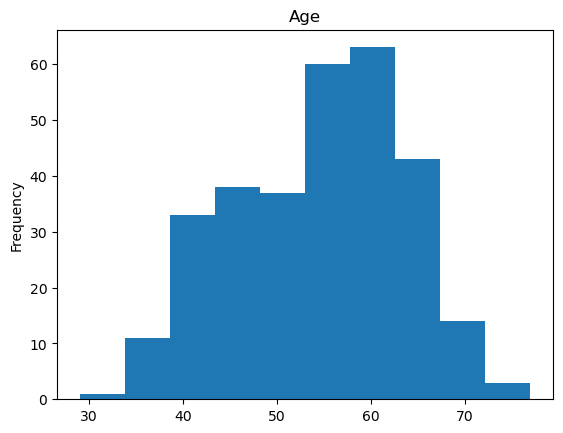

In [13]:
df.age.plot.hist()
plt.title('Age');

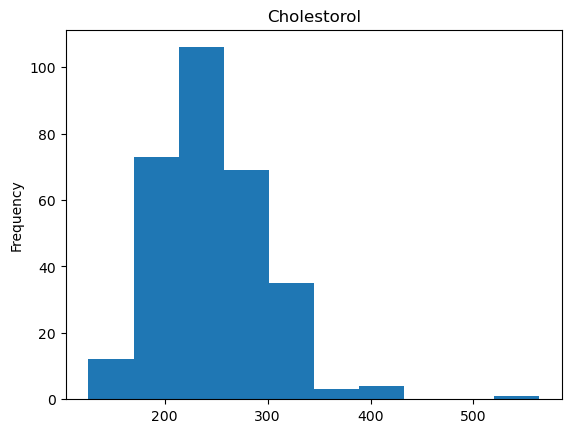

In [14]:
df.chol.plot.hist()
plt.title('Cholestorol');

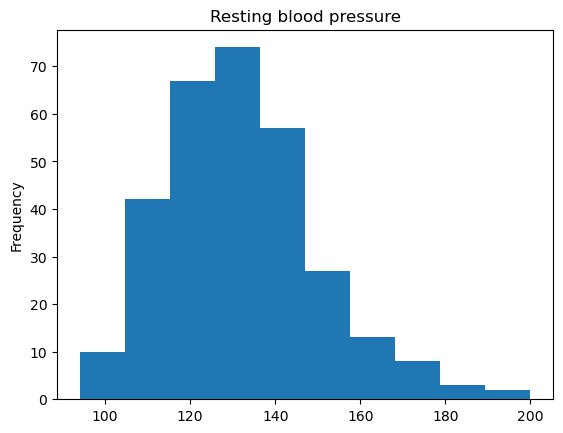

In [15]:
df.trestbps.plot.hist()
plt.title('Resting blood pressure');

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

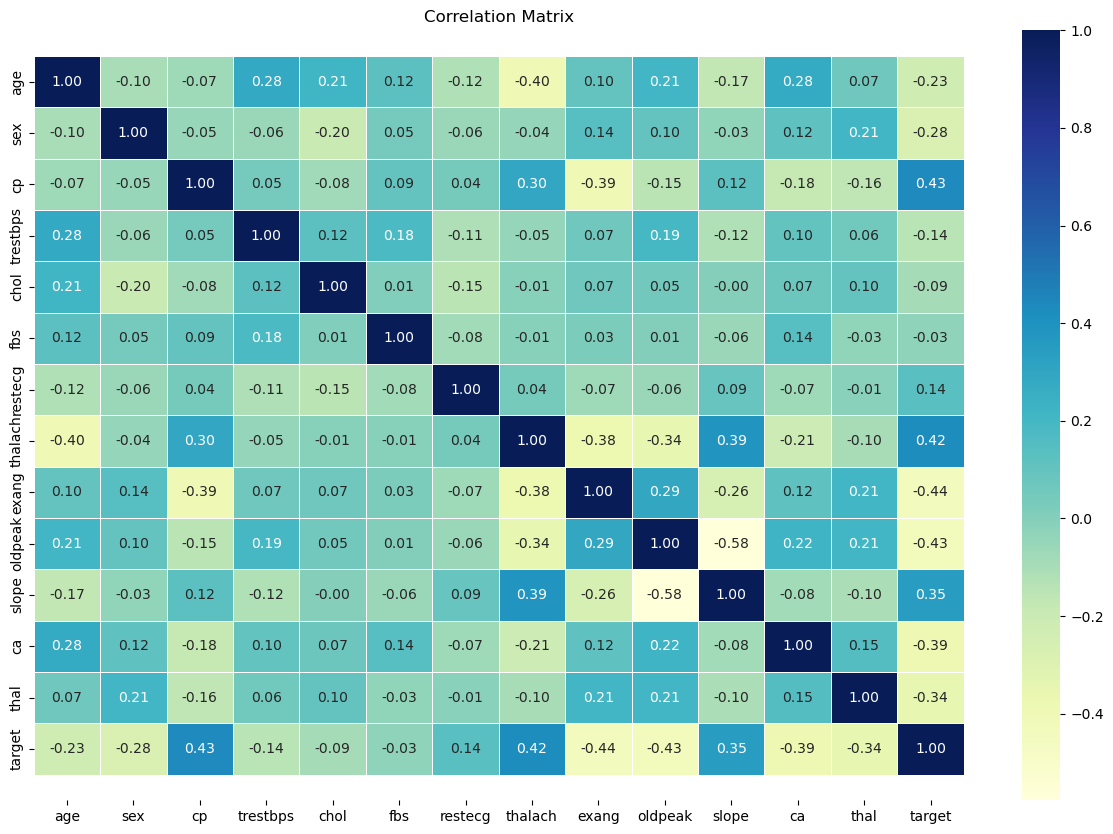

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='YlGnBu');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Correlation Matrix')

# Modelling

1. Split the data into features and target.
2. Split the target and feature data into training and testing sets.
3. Try three machine learning models to see which performs the best:
    * Logistic Regression
    * K-Nearest Neighbours Classifier
    * Random Forest Classifier

In [17]:
# 1. Split the data into features (x) and target (y)
x = df.drop('target', axis=1)
y = df['target']

In [18]:
# 2. Split the data into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Logistic Regression: 80.33%
K-Nearest Neighbour: 63.93%
Random Forest: 80.33%


/Users/matthewkriel/Desktop/ml-course/heart-disease-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


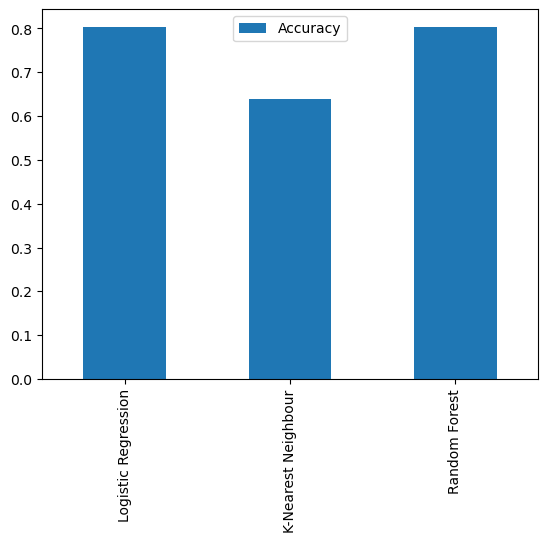

In [19]:
# 3. Test models

# Create a model dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbour': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Define a function to iterate through the various models in the model dictionary
def model_executor (models, x_train, x_test, y_train, y_test):
    # Create the empty dictionary that the function will return.
    model_scores = {}
    # Iterate through the models dictionary and fit and score each one.
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    # Return the results
    return model_scores

# Execute the function and display the results.
model_scores = model_executor(models, x_train, x_test, y_train, y_test)
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

# Iterate through the dictionary, display the results in HRF
for x, y in model_scores.items():
    print(f'{x}: {y*100:.2f}%')

# Hyperparameter tuning with RandomizedSearchCV

### LogisticRegression()

In [20]:
# Create LogistRegression hyperparameter grid
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Create RandomForestClassifier hyperparameter grid
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [21]:
# Setup the random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Train the model to see which parameters perform the best.
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
# Display the best parameter combination
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [23]:
# Score the model, with the best parameter combination, on the test set of data
# Display the accuracy score.
print(f'Accuracy: {rs_log_reg.score(x_test, y_test)*100:.2f}%')

Accuracy: 83.61%


### RandomForestClassifier()

In [24]:
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 18,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [26]:
print(f'Accuracy: {rs_rf.score(x_test, y_test)*100:.2f}%')

Accuracy: 78.69%


# Hyperparamter Tuning with GridSearchCV

In [27]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [28]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [29]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8360655737704918

# Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [30]:
# Make predictions on the test data with the tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [31]:
# 
y_test

14     1
150    1
8      1
70     1
119    1
      ..
137    1
135    1
283    0
33     1
217    0
Name: target, Length: 61, dtype: int64

### ROC Curve Display

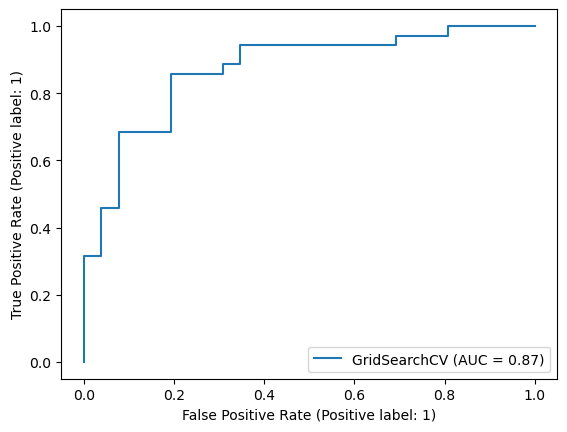

In [32]:
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

### Confusion matrix

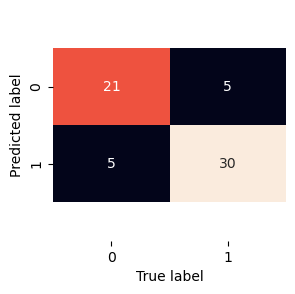

In [33]:
def plot_confusion_matrix(y_test, y_predictions):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_predictions),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_confusion_matrix(y_test, y_preds)

### Classification report

In [34]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.86      0.86      0.86        35

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



# Calculate evaluation metrics using cross-validation

In [35]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [37]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

TypeError: Singleton array 0.8032786885245902 cannot be considered a valid collection.

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(x_train, y_train);

In [ ]:
# Check coef_
clf.coef_

In [ ]:
df.head()

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);